In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
data = pd.read_csv('USA_cars_datasets (1).csv')

# Data Exploration

In [5]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [9]:
data.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


### Bivariate Analysis

In [10]:
# correlation


data.corr()

,price,year,mileage,lot
price,1.000000,0.418274,-0.400838,0.159369
year,0.418274,1.000000,-0.594686,0.164582
mileage,-0.400838,-0.594686,1.000000,-0.130475
lot,0.159369,0.164582,-0.130475,1.000000


<AxesSubplot:>

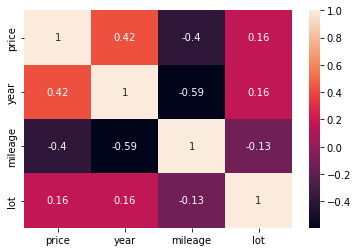

In [12]:
sb.heatmap(data.corr(), annot=True)

In [26]:





## to increase the font size
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 15,8
import matplotlib.pyplot as pt


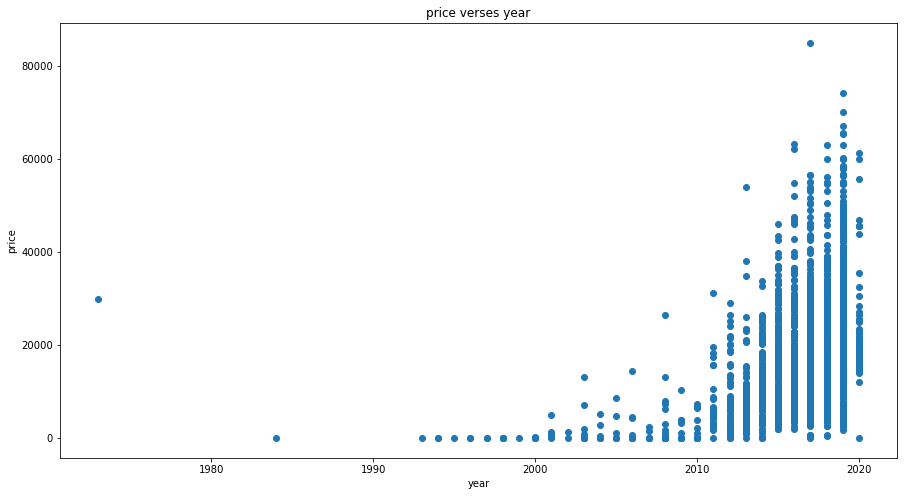

In [27]:
pt.scatter(data.year, data.price)
pt.title('price verses year')
pt.xlabel('year')
pt.ylabel('price')
pt.show()

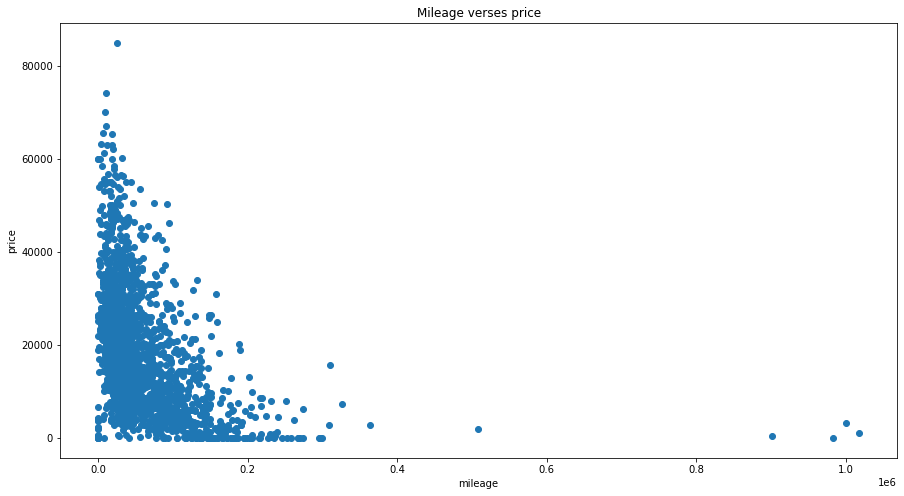

In [28]:
pt.scatter(data.mileage, data.price)
pt.title('Mileage verses price')
pt.xlabel('mileage')
pt.ylabel('price')
pt.show()

# Regression analysis

In [29]:
import statsmodels.api as sm

In [30]:
y = data['price'] #response variable or target variable
x = data[['mileage']] # explanatory variable or independent

In [31]:
c = sm.add_constant(x)

In [32]:
c

,const,mileage
0,1.0,274117.0
1,1.0,190552.0
2,1.0,39590.0
3,1.0,64146.0
4,1.0,6654.0
...,...,...
2494,1.0,23609.0
2495,1.0,34553.0
2496,1.0,31594.0
2497,1.0,32557.0


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression().fit(x,y)

In [37]:
model.coef_

array([-0.08134246])

In [38]:
model.intercept_

23021.775150244073

In [39]:
model.predict([[10000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22208.35055972])

In [40]:
print(-0.0813*10000+23021)

22208.0
